In [ ]:
!pip install dataprep

In [2]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from dataprep.eda import plot
from dataprep.eda import plot_correlation
from dataprep.eda import plot_missing


In [3]:
# ingest csv files.
cd = pd.read_csv('/content/customer_shopping_data.csv')
td = pd.read_csv('/content/scanner_data.csv')
id = pd.read_csv('/content/data.csv')

In [4]:
#convert csv files into dataframes.
customerData = pd.DataFrame(cd)
transactionData = pd.DataFrame(td)
inventoryData = pd.DataFrame(id)

In [7]:
# display data frame information.
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   inventory_id    99457 non-null  int64  
 1   invoice_no      99457 non-null  object 
 2   customer_id     99457 non-null  object 
 3   gender          99457 non-null  object 
 4   age             99457 non-null  int64  
 5   category        99457 non-null  object 
 6   quantity        99457 non-null  int64  
 7   price           99457 non-null  float64
 8   payment_method  99457 non-null  object 
 9   invoice_date    99457 non-null  object 
 10  shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 8.3+ MB


In [8]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


In [9]:
inventoryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   inventory_id                1746 non-null   int64 
 1   Department                  1746 non-null   object
 2   Class                       1746 non-null   object
 3   Size                        1688 non-null   object
 4   Inventory Units             1746 non-null   object
 5   Full Price Inventory Units  1746 non-null   object
 6   Markdown Inventory Units    1746 non-null   object
 7   Inventory Value             1746 non-null   object
 8   Full Price Inventory Value  1746 non-null   object
 9   Markdown Inventory Value    1746 non-null   object
 10  Units Sold                  1746 non-null   object
 11  Full Price Units Sold       1746 non-null   object
 12  Markdown Units Sold         1746 non-null   int64 
 13  Sales                       1746 non-null   obje

In [10]:
# see if there is missing values.
customerData.isnull().sum()

,0
inventory_id,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0


In [11]:
transactionData.isnull().sum()

,0
Unnamed: 0,0
Date,0
Customer_ID,0
Transaction_ID,0
SKU_Category,0
SKU,0
Quantity,0
Sales_Amount,0


In [12]:
inventoryData.isnull().sum()

,0
inventory_id,0
Department,0
Class,0
Size,58
Inventory Units,0
Full Price Inventory Units,0
Markdown Inventory Units,0
Inventory Value,0
Full Price Inventory Value,0
Markdown Inventory Value,0


In [ ]:
# check to see if there is duplicates.
customerData.duplicated().sum()
inventoryData.duplicated().sum()
transactionData.duplicated().sum()

0

In [ ]:
# convert date formats.
customerData['invoice_date']= customerData['invoice_date'].astype('datetime64[ns]')
transactionData['Date']= transactionData['Date'].astype('datetime64[ns]')

# Replace commas and $ to empty space in the relevant columns before converting to integers
customerData['inventory_id'] = customerData['inventory_id'].astype(int)
inventoryData['inventory_id'] = inventoryData['inventory_id'].astype(int)
inventoryData['Inventory Units'] = inventoryData['Inventory Units'].str.replace(',', '').astype(int)
inventoryData['Full Price Inventory Units'] = inventoryData['Full Price Inventory Units'].str.replace(',', '').astype(float)
inventoryData['Markdown Inventory Units'] = inventoryData['Markdown Inventory Units'].str.replace(',', '').astype(int)
inventoryData['Inventory Value'] = inventoryData['Inventory Value'].str.replace(',', '').str.replace('$', '').astype(float)
inventoryData['Full Price Inventory Value'] = inventoryData['Full Price Inventory Value'].str.replace(',', '').str.replace('$', '').astype(float)
inventoryData['Markdown Inventory Value'] = inventoryData['Markdown Inventory Value'].str.replace(',', '').str.replace('$', '').astype(float)
inventoryData['Units Sold'] = inventoryData['Units Sold'].str.replace(',', '').astype(int)
inventoryData['Full Price Units Sold'] = inventoryData['Full Price Units Sold'].str.replace(',', '').astype(int)
inventoryData['Sales'] = inventoryData['Sales'].str.replace(',', '').str.replace('$', '').astype(float)
inventoryData['Full Price Sales'] = inventoryData['Full Price Sales'].str.replace(',', '').str.replace('$', '').astype(float)
inventoryData['Markdown Sales'] = inventoryData['Markdown Sales'].str.replace(',', '').str.replace('$', '').astype(float)


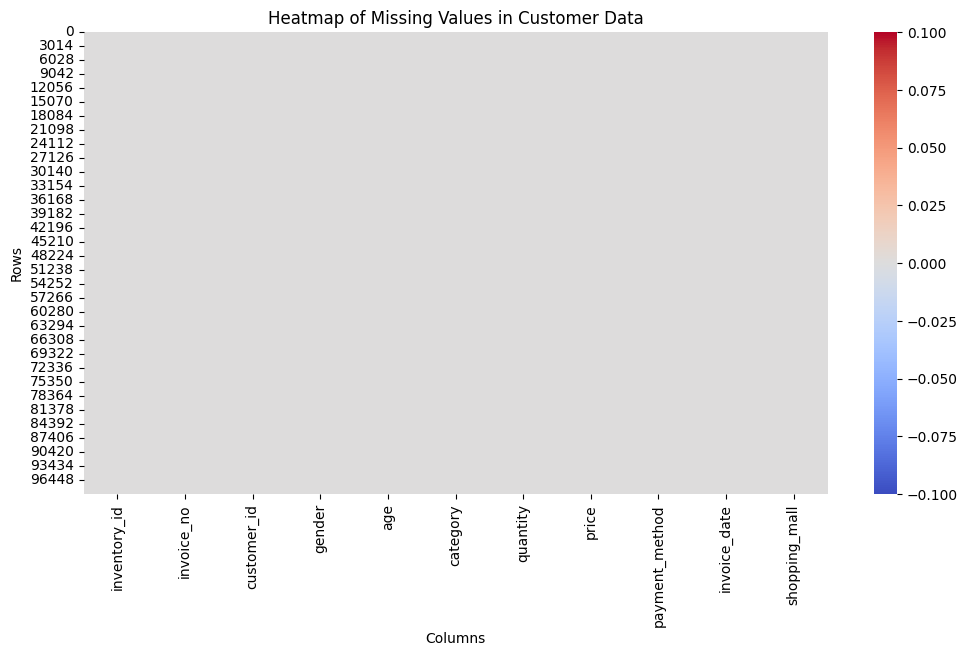

In [14]:
# Calculate the missing values in the DataFrame
missing_data1 = customerData.isnull()

# Set up the plot
plt.figure(figsize=(12, 6))

# Create a heatmap of missing values
sns.heatmap(missing_data1, cmap='coolwarm', cbar=True)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap of Missing Values in Customer Data')
plt.show()

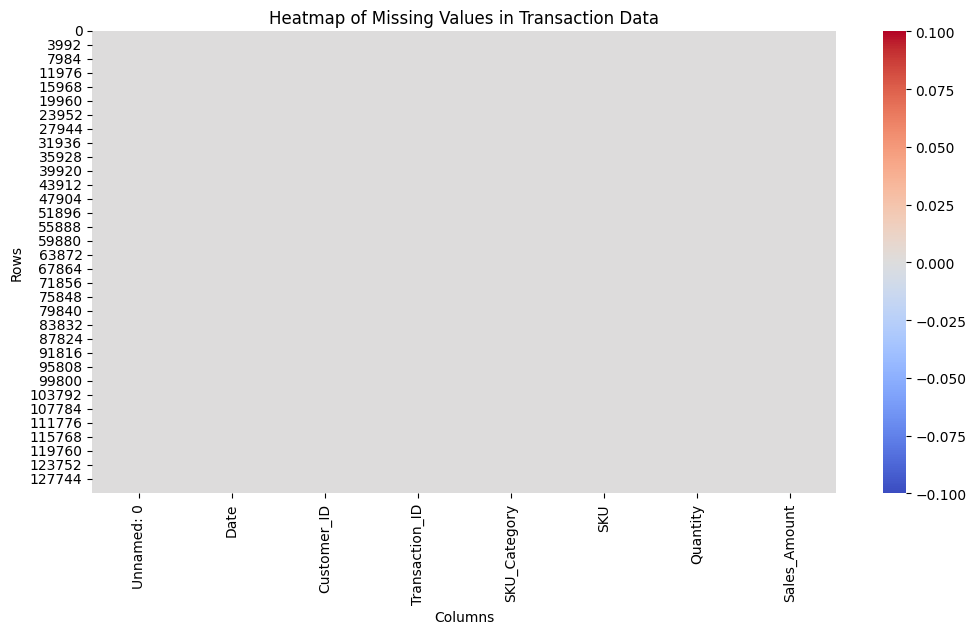

In [15]:
# Calculate the missing values in the DataFrame
missing_data2 = transactionData.isnull()

# Set up the plot
plt.figure(figsize=(12, 6))
sns.heatmap(missing_data2, cmap='coolwarm', cbar=True)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap of Missing Values in Transaction Data')
plt.show()

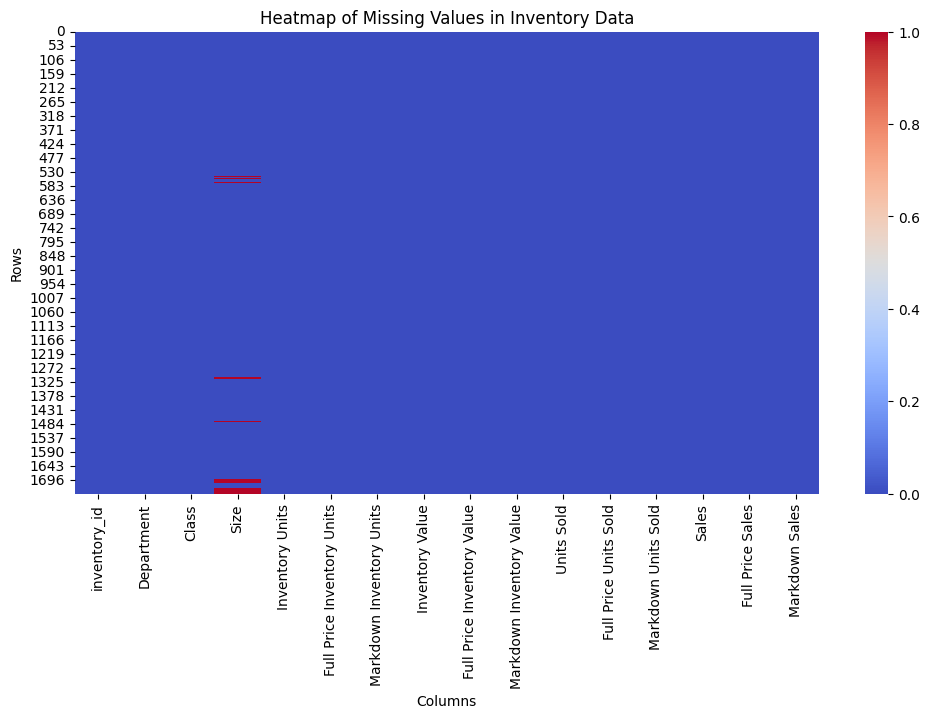

In [16]:
# Calculate the missing values in the DataFrame
missing_data3 = inventoryData.isnull()

# Set up the plot
plt.figure(figsize=(12, 6))
sns.heatmap(missing_data3, cmap='coolwarm', cbar=True)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap of Missing Values in Inventory Data')
plt.show()


In [17]:
# Merge customerData and inventoryData on the common column 'inventory_id
first_merge = pd.merge(customerData, inventoryData, on = 'inventory_id')

# Merge customerData and inventoryData on the common column 'inventory_id
final_df = pd.merge(first_merge, transactionData, left_on = 'inventory_id', right_on = 'Transaction_ID') # Merging to add transaction information.

# Display the final merged DataFrame
final_df


,inventory_id,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,...,Full Price Sales,Markdown Sales,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,...,114.95,0.0,1,2016-02-01,2547,1,X52,0EM7L,1.0,3.13
1,2,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,...,28.74,0.0,2,2016-02-01,822,2,2ML,68BRQ,1.0,5.46
2,3,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,...,0.00,75.0,3,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35
3,4,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,...,18.99,0.0,4,2016-02-01,3719,4,0H2,549KK,1.0,5.59
4,5,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,...,49.98,0.0,5,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,1743,I323718,C102567,Male,29,Clothing,1,300.08,Cash,2021-12-05,...,0.00,0.0,3622,2016-01-13,222,1743,IEV,VGGTR,2.0,7.61
3622,1744,I133821,C250146,Female,58,Cosmetics,2,81.32,Cash,2022-12-02,...,0.00,0.0,3623,2016-01-13,5390,1744,FEW,JJ9FT,1.0,5.79
3623,1744,I133821,C250146,Female,58,Cosmetics,2,81.32,Cash,2022-12-02,...,0.00,0.0,3624,2016-01-13,5390,1744,0WT,NZIB1,1.0,7.37
3624,1745,I134446,C661696,Female,53,Technology,5,5250.00,Cash,2023-01-24,...,0.00,0.0,3625,2016-01-13,1857,1745,JKC,D9SFZ,2.0,1.12


In [18]:
# remove redundant columns/features.
final_df.drop(['Unnamed: 0'], axis=1, inplace=True)
final_df.drop(['Date'], axis=1, inplace=True)
final_df.drop(['Customer_ID'], axis=1, inplace=True)
final_df.drop(['Transaction_ID'], axis=1, inplace=True)
final_df.drop(['SKU_Category'], axis=1, inplace=True)
final_df.drop(['SKU'], axis=1, inplace=True)
final_df.drop(['Quantity'], axis=1, inplace=True)
final_df.drop(['Sales_Amount'], axis=1, inplace=True)
final_df.drop(['category'], axis=1, inplace=True)
final_df.drop(['Class'], axis=1, inplace=True)
final_df.drop(['Units Sold'], axis=1, inplace=True)
final_df.drop(['Sales'], axis=1, inplace=True)
final_df.drop(['Full Price Sales'], axis=1, inplace=True)
final_df.drop(['Markdown Sales'], axis=1, inplace=True)
final_df

,inventory_id,invoice_no,customer_id,gender,age,quantity,price,payment_method,invoice_date,shopping_mall,Department,Size,Inventory Units,Full Price Inventory Units,Markdown Inventory Units,Inventory Value,Full Price Inventory Value,Markdown Inventory Value,Full Price Units Sold,Markdown Units Sold
0,1,I138884,C241288,Female,28,5,1500.40,Credit Card,2022-05-08,Kanyon,Casual Wear,24,64,64.0,0,1327.62,1327.62,0.0,5,0
1,2,I317333,C111565,Male,21,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,Casual Wear,24X28,21,21.0,0,517.29,517.29,0.0,2,0
2,3,I127801,C266599,Male,20,1,300.08,Cash,2021-09-11,Metrocity,Casual Wear,24x30,73,68.0,5,1618.08,1518.08,100.0,0,4
3,4,I173702,C988172,Female,66,5,3000.85,Credit Card,2021-05-16,Metropol AVM,Casual Wear,25,68,68.0,0,1495.58,1495.58,0.0,1,0
4,5,I337046,C189076,Female,53,4,60.60,Cash,2021-10-24,Kanyon,Casual Wear,25x28,64,64.0,0,1599.36,1599.36,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,1743,I323718,C102567,Male,29,1,300.08,Cash,2021-12-05,Metrocity,Haircare,NaN,481,481.0,0,18007.79,18007.79,0.0,0,0
3622,1744,I133821,C250146,Female,58,2,81.32,Cash,2022-12-02,Zorlu Center,Haircare,NaN,1651,1651.0,0,69606.70,69606.70,0.0,0,0
3623,1744,I133821,C250146,Female,58,2,81.32,Cash,2022-12-02,Zorlu Center,Haircare,NaN,1651,1651.0,0,69606.70,69606.70,0.0,0,0
3624,1745,I134446,C661696,Female,53,5,5250.00,Cash,2023-01-24,Mall of Istanbul,Haircare,NaN,3786,3682.0,104,61330.98,60498.98,832.0,0,0


In [19]:
# change some column names to have consistentcy.
final_df = final_df.rename(columns={'Department': 'department', 'Size': 'size',
                                    'Inventory Units': 'inventory_units',
                                    'Full Price Inventory Units': 'full_price_units',
                                    'Markdown Inventory Units': 'markdown_units',
                                    'Inventory Value': 'total_unit_value',
                                    'Full Price Inventory Value': 'full_price_value',
                                    'Markdown Inventory Value': 'markdown_value',
                                    'Full Price Units Sold': 'full_price_units_sold',
                                    'Markdown Units Sold': 'markdown_units_sold'})

In [20]:
#check for missing data.
missing_values = final_df.isnull().sum() / len(final_df) * 100
missing_values


,0
inventory_id,0.000000
invoice_no,0.000000
customer_id,0.000000
gender,0.000000
age,0.000000
quantity,0.000000
price,0.000000
payment_method,0.000000
invoice_date,0.000000
shopping_mall,0.000000


In [21]:
# fill in missing data.
final_df['size'].fillna(final_df['size'].mode()[0], inplace=True)
final_df

,inventory_id,invoice_no,customer_id,gender,age,quantity,price,payment_method,invoice_date,shopping_mall,department,size,inventory_units,full_price_units,markdown_units,total_unit_value,full_price_value,markdown_value,full_price_units_sold,markdown_units_sold
0,1,I138884,C241288,Female,28,5,1500.40,Credit Card,2022-05-08,Kanyon,Casual Wear,24,64,64.0,0,1327.62,1327.62,0.0,5,0
1,2,I317333,C111565,Male,21,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,Casual Wear,24X28,21,21.0,0,517.29,517.29,0.0,2,0
2,3,I127801,C266599,Male,20,1,300.08,Cash,2021-09-11,Metrocity,Casual Wear,24x30,73,68.0,5,1618.08,1518.08,100.0,0,4
3,4,I173702,C988172,Female,66,5,3000.85,Credit Card,2021-05-16,Metropol AVM,Casual Wear,25,68,68.0,0,1495.58,1495.58,0.0,1,0
4,5,I337046,C189076,Female,53,4,60.60,Cash,2021-10-24,Kanyon,Casual Wear,25x28,64,64.0,0,1599.36,1599.36,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,1743,I323718,C102567,Male,29,1,300.08,Cash,2021-12-05,Metrocity,Haircare,S,481,481.0,0,18007.79,18007.79,0.0,0,0
3622,1744,I133821,C250146,Female,58,2,81.32,Cash,2022-12-02,Zorlu Center,Haircare,S,1651,1651.0,0,69606.70,69606.70,0.0,0,0
3623,1744,I133821,C250146,Female,58,2,81.32,Cash,2022-12-02,Zorlu Center,Haircare,S,1651,1651.0,0,69606.70,69606.70,0.0,0,0
3624,1745,I134446,C661696,Female,53,5,5250.00,Cash,2023-01-24,Mall of Istanbul,Haircare,S,3786,3682.0,104,61330.98,60498.98,832.0,0,0


In [22]:
# check if missing data is gone.
final_df.isnull().sum()

,0
inventory_id,0
invoice_no,0
customer_id,0
gender,0
age,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [24]:
# get rid of duplicated data.
final_df.drop_duplicates(inplace=True)
final_df

,inventory_id,invoice_no,customer_id,gender,age,quantity,price,payment_method,invoice_date,shopping_mall,department,size,inventory_units,full_price_units,markdown_units,total_unit_value,full_price_value,markdown_value,full_price_units_sold,markdown_units_sold
0,1,I138884,C241288,Female,28,5,1500.40,Credit Card,2022-05-08,Kanyon,Casual Wear,24,64,64.0,0,1327.62,1327.62,0.0,5,0
1,2,I317333,C111565,Male,21,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,Casual Wear,24X28,21,21.0,0,517.29,517.29,0.0,2,0
2,3,I127801,C266599,Male,20,1,300.08,Cash,2021-09-11,Metrocity,Casual Wear,24x30,73,68.0,5,1618.08,1518.08,100.0,0,4
3,4,I173702,C988172,Female,66,5,3000.85,Credit Card,2021-05-16,Metropol AVM,Casual Wear,25,68,68.0,0,1495.58,1495.58,0.0,1,0
4,5,I337046,C189076,Female,53,4,60.60,Cash,2021-10-24,Kanyon,Casual Wear,25x28,64,64.0,0,1599.36,1599.36,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,1742,I400888,C143471,Male,39,5,203.30,Debit Card,2023-07-02,Zorlu Center,Haircare,S,9090,6232.0,2858,89705.08,64560.48,25144.6,0,0
3621,1743,I323718,C102567,Male,29,1,300.08,Cash,2021-12-05,Metrocity,Haircare,S,481,481.0,0,18007.79,18007.79,0.0,0,0
3622,1744,I133821,C250146,Female,58,2,81.32,Cash,2022-12-02,Zorlu Center,Haircare,S,1651,1651.0,0,69606.70,69606.70,0.0,0,0
3624,1745,I134446,C661696,Female,53,5,5250.00,Cash,2023-01-24,Mall of Istanbul,Haircare,S,3786,3682.0,104,61330.98,60498.98,832.0,0,0


In [25]:
# make mapping dictionary.
gender_map = {'Male' : 0,
              'Female': 1}
# apply mapping to geder column.
final_df['gender'] = final_df['gender'].map(gender_map)
final_df

,inventory_id,invoice_no,customer_id,gender,age,quantity,price,payment_method,invoice_date,shopping_mall,department,size,inventory_units,full_price_units,markdown_units,total_unit_value,full_price_value,markdown_value,full_price_units_sold,markdown_units_sold
0,1,I138884,C241288,1,28,5,1500.40,Credit Card,2022-05-08,Kanyon,Casual Wear,24,64,64.0,0,1327.62,1327.62,0.0,5,0
1,2,I317333,C111565,0,21,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,Casual Wear,24X28,21,21.0,0,517.29,517.29,0.0,2,0
2,3,I127801,C266599,0,20,1,300.08,Cash,2021-09-11,Metrocity,Casual Wear,24x30,73,68.0,5,1618.08,1518.08,100.0,0,4
3,4,I173702,C988172,1,66,5,3000.85,Credit Card,2021-05-16,Metropol AVM,Casual Wear,25,68,68.0,0,1495.58,1495.58,0.0,1,0
4,5,I337046,C189076,1,53,4,60.60,Cash,2021-10-24,Kanyon,Casual Wear,25x28,64,64.0,0,1599.36,1599.36,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,1742,I400888,C143471,0,39,5,203.30,Debit Card,2023-07-02,Zorlu Center,Haircare,S,9090,6232.0,2858,89705.08,64560.48,25144.6,0,0
3621,1743,I323718,C102567,0,29,1,300.08,Cash,2021-12-05,Metrocity,Haircare,S,481,481.0,0,18007.79,18007.79,0.0,0,0
3622,1744,I133821,C250146,1,58,2,81.32,Cash,2022-12-02,Zorlu Center,Haircare,S,1651,1651.0,0,69606.70,69606.70,0.0,0,0
3624,1745,I134446,C661696,1,53,5,5250.00,Cash,2023-01-24,Mall of Istanbul,Haircare,S,3786,3682.0,104,61330.98,60498.98,832.0,0,0


In [26]:
# filter to display the transactions made in either 'Kanyon' or 'Metrocity' shopping mall in 2023.
kanyon_metrocity_2023 = final_df[final_df['shopping_mall'].isin(['Kanyon', 'Metrocity'])
                                  & (final_df['invoice_date'] >= '2023-01-01')]
print("Transactions of 2023 in Kanyon and Metrocity Shopping Malls:")
kanyon_metrocity_2023

Transactions of 2023 in Kanyon and Metrocity Shopping Malls:


,inventory_id,invoice_no,customer_id,gender,age,quantity,price,payment_method,invoice_date,shopping_mall,department,size,inventory_units,full_price_units,markdown_units,total_unit_value,full_price_value,markdown_value,full_price_units_sold,markdown_units_sold
143,82,I321683,C542025,0,60,4,162.64,Credit Card,2023-06-01,Metrocity,Best Brands Casual,18,29,3.0,26,734.98,104.98,630.00,2,1
175,103,I985478,C324683,0,55,4,1200.32,Credit Card,2023-01-24,Kanyon,Best Brands Casual,16,93,10.0,83,1837.40,599.90,1237.50,7,8
246,144,I215279,C223343,1,31,2,600.16,Credit Card,2023-01-02,Kanyon,Best Brands Casual,6,44,29.0,15,5662.41,4419.71,1242.70,5,0
294,172,I170160,C244213,0,34,2,71.68,Debit Card,2023-02-26,Metrocity,Knitwear,M,28,0.0,28,192.85,0.00,192.85,0,9
349,206,I504141,C558480,1,56,1,40.66,Credit Card,2023-02-23,Kanyon,Contemporary,32,295,295.0,0,11144.80,11144.80,0.00,58,0
428,239,I428118,C826744,1,44,2,1200.34,Credit Card,2023-12-01,Kanyon,Contemporary,XS,357,332.0,25,16883.69,15251.69,1632.00,39,3
485,264,I239703,C109489,0,23,3,15.69,Credit Card,2023-01-17,Kanyon,Contemporary,XL,167,167.0,0,6494.33,6494.33,0.00,11,0
583,304,I216982,C269751,1,48,4,46.92,Cash,2023-02-01,Metrocity,Contemporary,4,57,57.0,0,1661.44,1661.44,0.00,6,0
588,306,I115679,C266462,0,27,1,300.08,Cash,2023-10-01,Kanyon,Contemporary,8,53,53.0,0,2029.47,2029.47,0.00,6,0
866,443,I946433,C387164,1,29,4,4200.00,Debit Card,2023-02-02,Kanyon,Junior Sportswear,33/30,11,0.0,11,209.00,0.00,209.00,0,2


In [27]:
# Filter for purchases made 200 in the casual wear department.
purchase_200_CW = final_df[(final_df['price'] >= 200)
                  & (final_df['department'] == 'Casual Wear')]
print("Transactions over £200 made in Casual Wear: ")
purchase_200_CW

Transactions over £200 made in Casual Wear: 


,inventory_id,invoice_no,customer_id,gender,age,quantity,price,payment_method,invoice_date,shopping_mall,department,size,inventory_units,full_price_units,markdown_units,total_unit_value,full_price_value,markdown_value,full_price_units_sold,markdown_units_sold
0,1,I138884,C241288,1,28,5,1500.40,Credit Card,2022-05-08,Kanyon,Casual Wear,24,64,64.0,0,1327.62,1327.62,0.00,5,0
1,2,I317333,C111565,0,21,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,Casual Wear,24X28,21,21.0,0,517.29,517.29,0.00,2,0
2,3,I127801,C266599,0,20,1,300.08,Cash,2021-09-11,Metrocity,Casual Wear,24x30,73,68.0,5,1618.08,1518.08,100.00,0,4
3,4,I173702,C988172,1,66,5,3000.85,Credit Card,2021-05-16,Metropol AVM,Casual Wear,25,68,68.0,0,1495.58,1495.58,0.00,1,0
5,6,I227836,C657758,1,28,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,Casual Wear,25x30,31,31.0,0,759.70,759.70,0.00,0,0
8,8,I293112,C176086,1,32,2,600.16,Credit Card,2021-01-13,Mall of Istanbul,Casual Wear,26/30,1,1.0,0,16.99,16.99,0.00,1,0
9,9,I293455,C159642,0,69,3,900.24,Credit Card,2021-04-11,Metrocity,Casual Wear,26x28,45,45.0,0,1119.55,1119.55,0.00,1,0
11,10,I326945,C283361,1,60,2,600.16,Credit Card,2021-08-22,Kanyon,Casual Wear,26x30,74,35.0,39,1475.65,707.65,768.00,0,9
18,14,I179802,C312861,0,25,2,600.16,Cash,2022-11-17,Cevahir AVM,Casual Wear,27x28,136,136.0,0,3381.15,3381.15,0.00,14,0
19,15,I336189,C555402,1,67,2,600.16,Credit Card,2022-03-06,Kanyon,Casual Wear,27x32,18,18.0,0,437.32,437.32,0.00,1,0


In [28]:
# Filter data for the years 2022 and 2023
filtered_years = final_df[(final_df['invoice_date'] >= '2022-01-01')
                            & (final_df['invoice_date'] <= '2023-12-31')].copy()

# Create a new feature 'total_sales' which is price * quantity for the filtered data
filtered_years['total_sales'] = filtered_years['quantity'] * filtered_years['price']

# Now, calculate the total sales for each department in the filtered data
total_department_sales = filtered_years.groupby('department')['total_sales'].sum().reset_index()

# Display the total sales by department
print("The total sales made in each department (2022 - 2023)")
total_department_sales

The total sales made in each department (2022 - 2023)


,department,total_sales
0,Activewear,99549.25
1,Bath Body Hair,32318.53
2,Bath Shop/Textiles,49012.52
3,Bedding,76585.73
4,Best Brands Casual,138517.35
5,Casual Wear,100953.79
6,Children's Accessories,162.64
7,Contemporary,141425.33
8,Decorative Textiles,186538.65
9,Dresses/Ladies Suits,76890.57


In [29]:
# Calculate the price of each unit.
final_df['price_per_unit'] = final_df['price'] / final_df['quantity']
final_df

,inventory_id,invoice_no,customer_id,gender,age,quantity,price,payment_method,invoice_date,shopping_mall,...,size,inventory_units,full_price_units,markdown_units,total_unit_value,full_price_value,markdown_value,full_price_units_sold,markdown_units_sold,price_per_unit
0,1,I138884,C241288,1,28,5,1500.40,Credit Card,2022-05-08,Kanyon,...,24,64,64.0,0,1327.62,1327.62,0.0,5,0,300.08
1,2,I317333,C111565,0,21,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,...,24X28,21,21.0,0,517.29,517.29,0.0,2,0,600.17
2,3,I127801,C266599,0,20,1,300.08,Cash,2021-09-11,Metrocity,...,24x30,73,68.0,5,1618.08,1518.08,100.0,0,4,300.08
3,4,I173702,C988172,1,66,5,3000.85,Credit Card,2021-05-16,Metropol AVM,...,25,68,68.0,0,1495.58,1495.58,0.0,1,0,600.17
4,5,I337046,C189076,1,53,4,60.60,Cash,2021-10-24,Kanyon,...,25x28,64,64.0,0,1599.36,1599.36,0.0,2,0,15.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,1742,I400888,C143471,0,39,5,203.30,Debit Card,2023-07-02,Zorlu Center,...,S,9090,6232.0,2858,89705.08,64560.48,25144.6,0,0,40.66
3621,1743,I323718,C102567,0,29,1,300.08,Cash,2021-12-05,Metrocity,...,S,481,481.0,0,18007.79,18007.79,0.0,0,0,300.08
3622,1744,I133821,C250146,1,58,2,81.32,Cash,2022-12-02,Zorlu Center,...,S,1651,1651.0,0,69606.70,69606.70,0.0,0,0,40.66
3624,1745,I134446,C661696,1,53,5,5250.00,Cash,2023-01-24,Mall of Istanbul,...,S,3786,3682.0,104,61330.98,60498.98,832.0,0,0,1050.00


In [30]:
# Create a connection to SQLite database.
conn = sqlite3.connect('customer_purchase_data.db')

In [31]:
# separate the columns that are related to the respective table and store as a dataframe.
customers_data = final_df[['customer_id', 'gender', 'age']]
# load dataframe into database as table.
customers_data.to_sql('Customer_details', conn, index=False)

1746

In [32]:
inventory_data = final_df[['inventory_id', 'department', 'inventory_units',
                           'full_price_units', 'markdown_units', 'total_unit_value',
                           'full_price_value', 'markdown_value', 'full_price_units_sold',
                           'markdown_units_sold']]
inventory_data.to_sql('Inventory', conn, if_exists='replace', index=False)

1746

In [33]:
transaction_data = final_df[['invoice_no','inventory_id', 'customer_id', 'invoice_date',
                             'shopping_mall', 'size','price_per_unit','quantity',
                             'price', 'payment_method']]
transaction_data.to_sql('Transactions', conn, if_exists='replace', index=False)

1746

In [34]:
query = 'SELECT * FROM Customer_details'
result = pd.read_sql(query, conn)
print(result)

     customer_id  gender  age
0        C241288       1   28
1        C111565       0   21
2        C266599       0   20
3        C988172       1   66
4        C189076       1   53
...          ...     ...  ...
1741     C143471       0   39
1742     C102567       0   29
1743     C250146       1   58
1744     C661696       1   53
1745     C474588       1   64

[1746 rows x 3 columns]


In [35]:
query1 = 'SELECT * FROM Inventory'
result = pd.read_sql(query1, conn)
print(result)

      inventory_id   department  inventory_units  full_price_units  \
0                1  Casual Wear               64              64.0   
1                2  Casual Wear               21              21.0   
2                3  Casual Wear               73              68.0   
3                4  Casual Wear               68              68.0   
4                5  Casual Wear               64              64.0   
...            ...          ...              ...               ...   
1741          1742     Haircare             9090            6232.0   
1742          1743     Haircare              481             481.0   
1743          1744     Haircare             1651            1651.0   
1744          1745     Haircare             3786            3682.0   
1745          1746     Haircare             1207              24.0   

      markdown_units  total_unit_value  full_price_value  markdown_value  \
0                  0           1327.62           1327.62             0.0   
1      

In [36]:
query2 = 'SELECT * FROM Transactions'
result = pd.read_sql(query2, conn)
print(result)

     invoice_no  inventory_id customer_id         invoice_date  \
0       I138884             1     C241288  2022-05-08 00:00:00   
1       I317333             2     C111565  2021-12-12 00:00:00   
2       I127801             3     C266599  2021-09-11 00:00:00   
3       I173702             4     C988172  2021-05-16 00:00:00   
4       I337046             5     C189076  2021-10-24 00:00:00   
...         ...           ...         ...                  ...   
1741    I400888          1742     C143471  2023-07-02 00:00:00   
1742    I323718          1743     C102567  2021-12-05 00:00:00   
1743    I133821          1744     C250146  2022-12-02 00:00:00   
1744    I134446          1745     C661696  2023-01-24 00:00:00   
1745    I549884          1746     C474588  2021-02-10 00:00:00   

         shopping_mall   size  price_per_unit  quantity    price  \
0               Kanyon     24          300.08         5  1500.40   
1       Forum Istanbul  24X28          600.17         3  1800.51   
2  

In [37]:
#disconnect database.
conn.close()